# **1. Data Understanding**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF

pd.set_option('display.max_columns',50)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore.csv']), encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']


List all Features and provide a definition

*   **Row ID**: Row number.
*   **Order ID**: A unique string code that gets assigned to an order placed by a customer.
*   **Order Date**: The date that a customer has completed a transaction and made a purchase from the Superstore.
*   **Ship Date**: The date an order is shipped from a warehouse or store to a customer.
*   **Ship Mode**: Class- First Class, Second Class, Standard Class, Same Day.
*   **Customer ID**: A unique string code that gets assigned to each customer.
*   **Segment**: Customer type- Consumer, Corporate, Home Office.
*   **Country**: The country of an order address.
*   **City**: The city of an order address.
*   **State**: The state of an order address.
*   **Postal Code**: The postal code of an order address.
*   **Region**: The region of an order address.
*   **Product ID**: A unique string code that gets assigned to each product.
*   **Category**: The category of a product.
*   **Sub-Category**: The sub-category of a product.
*   **Product Name**: The name of a product.
*   **Sales**: The total price for a product placed in a certain quantity in an order.
*   **Quantity**: Number of items sold for a product in an order.
*   **Discount**: Represents the rate applied at the product level in an order.
*   **Profit**: The profit the Superstore gets for each product in an order.





In [8]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 9994 rows and 21 columns.


In [9]:
df.shape

(9994, 21)

In [10]:
df.isna().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [13]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
df_num = df.filter(['Sales','Quantity', 'Discount', 'Profit'], axis=1)
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


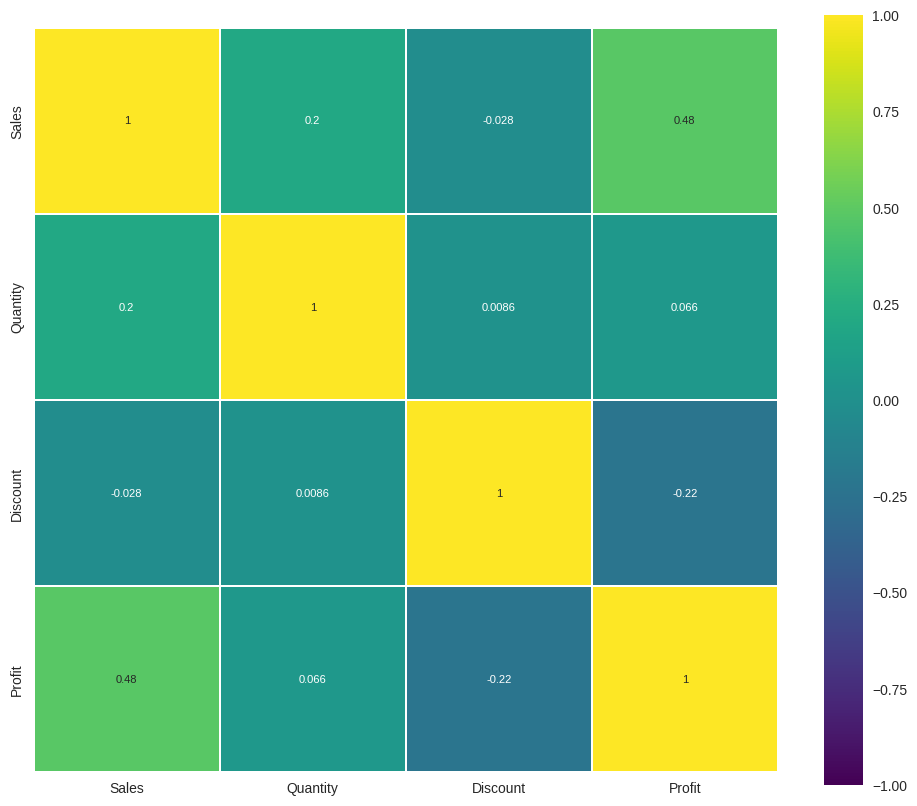

In [15]:
# prompt: graph correlation of all numerical variables
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


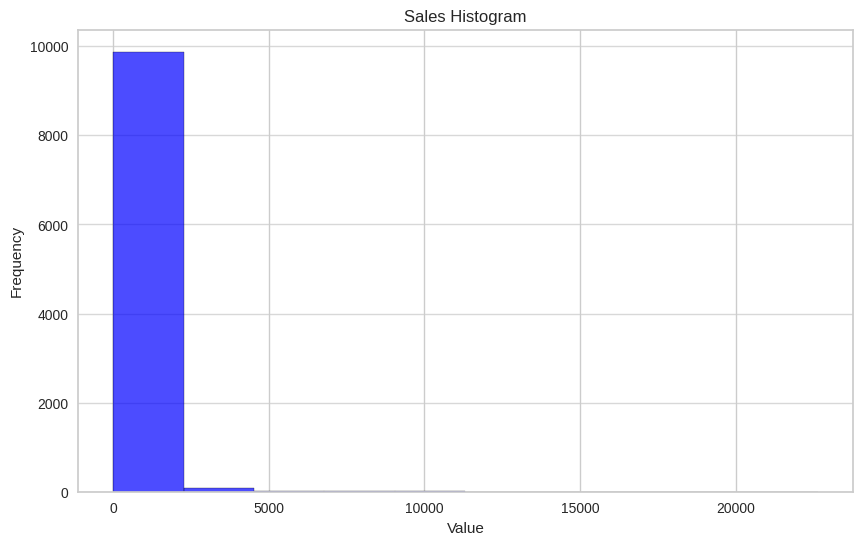

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Sales'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Sales Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

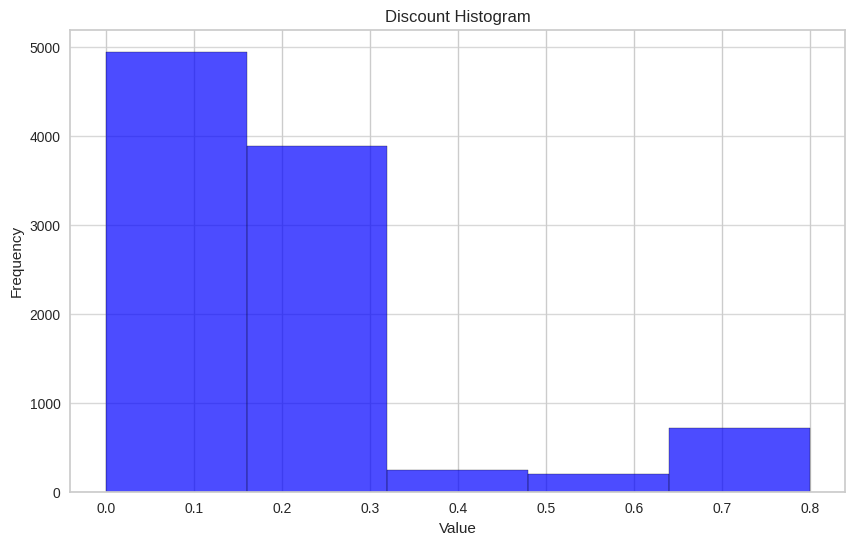

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Discount'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Discount Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

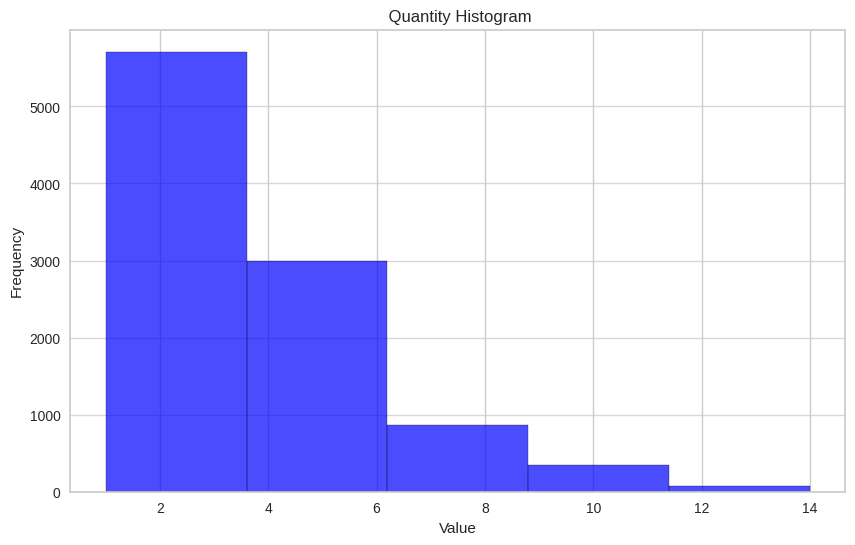

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Quantity'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title(' Quantity Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

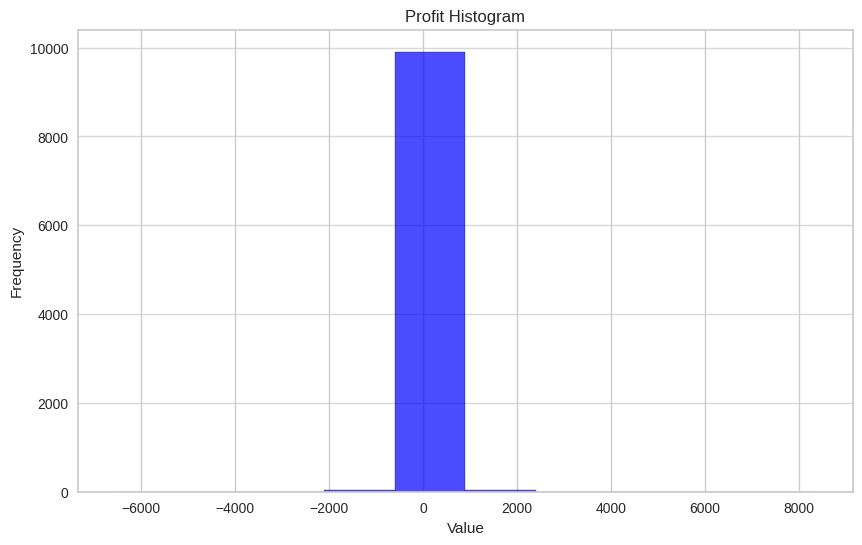

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Profit'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Profit Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

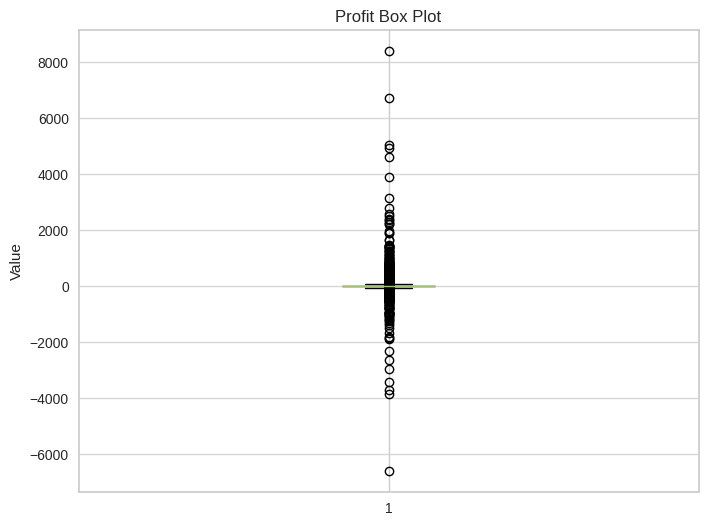

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_num['Profit'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Customize the plot
plt.title('Profit Box Plot')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

In [21]:
df.describe(include="object").T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


In [22]:
df[df.duplicated(['Product Name'], keep=False) & ~df.duplicated(['Product Name', 'Product ID'], keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6764,6765,CA-2016-144764,9/2/2016,9/8/2016,Standard Class,RL-19615,Rob Lucas,Consumer,United States,Chicago,Illinois,60623,Central,TEC-MA-10003230,Technology,Machines,Okidata C610n Printer,1362.9,3,0.3,-19.47
7292,7293,CA-2017-109183,12/4/2017,12/9/2017,Standard Class,LR-16915,Lena Radford,Consumer,United States,Nashville,Tennessee,37211,South,TEC-MA-10001856,Technology,Machines,Okidata C610n Printer,649.0,2,0.5,-272.58


In [23]:
df['Country'].unique()

array(['United States'], dtype=object)

Converting into the appropriate datatypes

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],format='mixed')

In [25]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [26]:
df['Ship Date'].min(), df['Ship Date'].max()

(Timestamp('2014-01-07 00:00:00'), Timestamp('2018-01-05 00:00:00'))

In [27]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [28]:
df['Customer ID'].nunique(), df['Customer Name'].nunique()


(793, 793)

In [29]:
df['Postal Code'].nunique(), df['City'].nunique()

(631, 531)

In [30]:
df = df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Country'], axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Analyzing The Customers with Negative Profit


In [31]:
# Customers with negative profit
neg_profit_customers = df[df["Profit"] < 0]["Customer ID"].unique()

# Dataset 1: Orders by customers with negative profit
df_neg_profit_customers = df[df["Customer ID"].isin(neg_profit_customers)]

# Dataset 2: Orders by customers with no negative profit
df_other_customers = df[~df["Customer ID"].isin(neg_profit_customers)]

In [34]:
df_neg_profit_customers.shape[0], df_other_customers.shape[0]

(8598, 1396)

### In Terms of Categorical Features

In [35]:
(df["Segment"].value_counts() / df.shape[0]) * 100

,count
Segment,
Consumer,51.941165
Corporate,30.218131
Home Office,17.840704


In [36]:
(df_neg_profit_customers["Segment"].value_counts() / df_neg_profit_customers.shape[0]) * 100

,count
Segment,
Consumer,51.674808
Corporate,30.635031
Home Office,17.690161


In [37]:
((df["State"].value_counts() / df.shape[0]) * 100).head()

,count
State,
California,20.022013
New York,11.286772
Texas,9.855914
Pennsylvania,5.873524
Washington,5.063038


In [38]:
((df_neg_profit_customers["State"].value_counts() / df_neg_profit_customers.shape[0]) * 100).head()

,count
State,
California,19.178879
Texas,10.793208
New York,10.642010
Pennsylvania,6.513143
Illinois,5.478018


In [39]:
((df_neg_profit_customers["Category"].value_counts() / df_neg_profit_customers.shape[0]) * 100).head()

,count
Category,
Office Supplies,60.258200
Furniture,21.551524
Technology,18.190277


In [40]:
((df["Category"].value_counts() / df.shape[0]) * 100).head()

,count
Category,
Office Supplies,60.296178
Furniture,21.222734
Technology,18.481089


It seems that there is no significant difference in terms of the segments and the state of the customers, also the category of the products.

### In Terms of Order Date, and Numerical Features

In [41]:
df_neg_profit_customers.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,8598,2016-04-29 14:58:22.023726592,2014-01-03 00:00:00,2015-05-26 00:00:00,2016-06-23 00:00:00,2017-05-12 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,8598,2016-05-03 14:18:40.446615296,2014-01-07 00:00:00,2015-05-29 00:00:00,2016-06-26 00:00:00,2017-05-15 00:00:00,2018-01-05 00:00:00,NaN
Sales,8598.0,229.765413,0.444,17.006,54.272,209.9625,22638.48,627.982801
Quantity,8598.0,3.794022,1.0,2.0,3.0,5.0,14.0,2.235319
Discount,8598.0,0.17105,0.0,0.0,0.2,0.2,0.8,0.21573
Profit,8598.0,23.972701,-6599.978,1.002,7.717,27.882,8399.976,238.131545


In [42]:
df_other_customers.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,1396,2016-05-02 08:27:30.429799424,2014-01-13 00:00:00,2015-04-16 00:00:00,2016-07-14 00:00:00,2017-06-05 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,1396,2016-05-06 05:20:48.137535744,2014-01-15 00:00:00,2015-04-19 18:00:00,2016-07-18 00:00:00,2017-06-10 18:00:00,2018-01-03 00:00:00,NaN
Sales,1396.0,230.42825,0.99,18.276,55.16,208.845,10499.97,593.447762
Quantity,1396.0,3.762178,1.0,2.0,3.0,5.0,14.0,2.161747
Discount,1396.0,0.064756,0.0,0.0,0.0,0.2,0.4,0.093732
Profit,1396.0,57.506977,0.0,5.6643,14.1655,42.02625,5039.9856,206.58745


Again there is no significant difference, except the profit and discount as excepted.

### In Terms of Average Item Numbers

In [43]:
neg_profit_customers_avg_item_num = df_neg_profit_customers.shape[0] / df_neg_profit_customers['Customer ID'].nunique()
print(neg_profit_customers_avg_item_num)

13.476489028213166


In [44]:
other_customers_avg_item_num = df_other_customers.shape[0] / df_other_customers["Customer ID"].nunique()
print(other_customers_avg_item_num)

9.006451612903225


This difference is significant. Let's dig a little deeper into this.

In [45]:
df_neg_profit_customers_item_counts = df_neg_profit_customers.groupby("Customer ID").size().reset_index(name="item_count")
df_other_customers_item_counts = df_other_customers.groupby("Customer ID").size().reset_index(name="item_count")

In [46]:
df_neg_profit_customers_item_counts.describe().T

,count,mean,std,min,25%,50%,75%,max
item_count,638.0,13.476489,6.201123,2.0,9.0,13.0,17.0,37.0


In [47]:
df_other_customers_item_counts.describe().T

,count,mean,std,min,25%,50%,75%,max
item_count,155.0,9.006452,5.017498,1.0,5.0,9.0,12.0,28.0


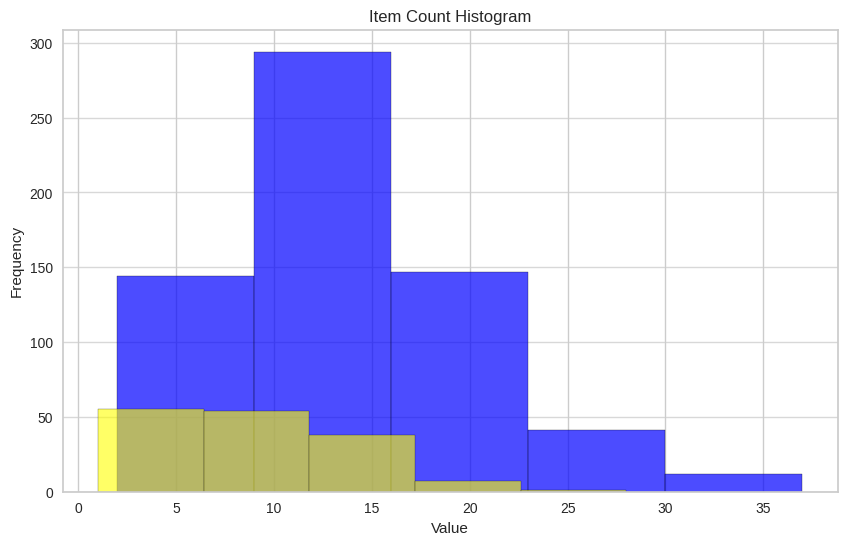

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df_neg_profit_customers_item_counts['item_count'], bins=5, edgecolor='black', color='blue', alpha=0.7)
plt.hist(df_other_customers_item_counts['item_count'], bins=5, edgecolor='black', color='yellow', alpha=0.6)
# Customize the plot
plt.title('Item Count Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

We see that customers whose orders resulted in negative profits mostly placed 9-16 products, while others mostly placed products less than 10. Now, we can talk about the relationship between the discount amount (negative profit) and the number of products which each customers placed.

In [63]:
df_test = df.groupby("Customer ID").agg(
    count = ("Customer ID", "size"),
    disc = ("Discount", "mean")
)

In [64]:
df_test

,count,disc
Customer ID,,
AA-10315,11,0.090909
AA-10375,15,0.080000
AA-10480,12,0.016667
AA-10645,18,0.063889
AB-10015,6,0.066667
...,...,...
XP-21865,28,0.046429
YC-21895,8,0.075000
YS-21880,12,0.050000


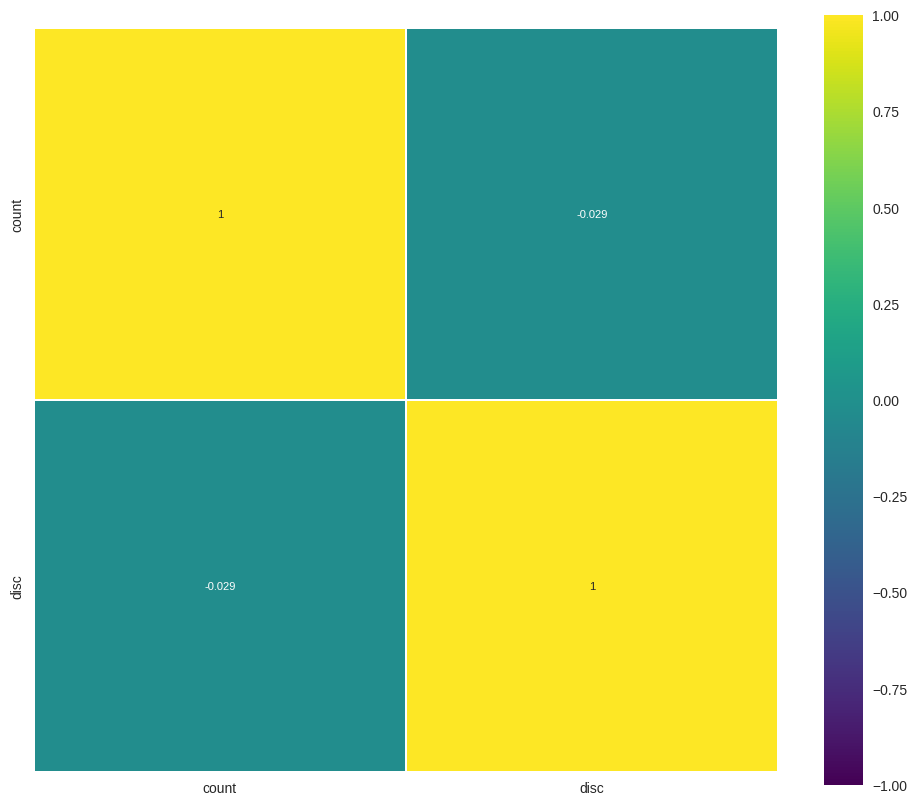

In [65]:
corr = df_test.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

After examining this correlation matrix, I do not think that there is a relation between the number of the products a customer placed and discount applied to these products. I also could not find any other significant factor for these discounts, such as customer age. I guess that the Superstore offers discounts in the product level, and the customers who care about discounts do not miss them.